Este análisis tiene como objetivo evaluar la **estrategia de contenido de Netflix durante 2023**, a partir de los patrones de comportamiento de su audiencia: engagement, preferencias de idioma, tipo de contenido, distribución temporal de los estrenos, y su relación con festividades y días de la semana.

La siguiente base de datos está compuesta por 6 variables:


*   **Title**: Título de la serie o película
*   **Available Globally?**: (Yes/No) ¿Disponible a nivel global?
* **Release Date**: Fecha de estreno
* **Hours Viewed**: Total de horas vistas por serie o película
* **Language Indicator**: Idioma de la serie o película
* **Content Type**: Tipo de contenido



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
netflix_df=pd.read_csv("/content/netflix_content_2023.csv", parse_dates=True)

In [13]:
netflix_df["Release Date"] = pd.to_datetime(netflix_df["Release Date"])

In [14]:
df_2023=netflix_df[netflix_df["Release Date"].dt.year == 2023]
df=df_2023.copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786 entries, 0 to 24498
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                786 non-null    object        
 1   Available Globally?  786 non-null    object        
 2   Release Date         786 non-null    datetime64[ns]
 3   Hours Viewed         786 non-null    object        
 4   Language Indicator   786 non-null    object        
 5   Content Type         786 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 43.0+ KB


In [16]:
df["Hours Viewed"] = df["Hours Viewed"].str.replace(",", "", regex=False).astype(float)

In [17]:
df["Release Date"]=pd.to_datetime(df["Release Date"])
df['Release Month'] = df['Release Date'].dt.month
df['Release Day']=df['Release Date'].dt.day_name()

####Duplicated and null values

In [18]:
len(df[df.duplicated()])

0

In [19]:
df.isna().sum().rename("Total Nulos")

,Total Nulos
Title,0
Available Globally?,0
Release Date,0
Hours Viewed,0
Language Indicator,0
Content Type,0
Release Month,0
Release Day,0


####Variables analysis

In [20]:
def billions(x):
  return x/1000000000

def millions(x):
  return x/1000000

In [21]:
release_content=df.groupby("Content Type").Title.count().rename("Total Releases")
release_content

,Total Releases
Content Type,
Movie,306
Show,480


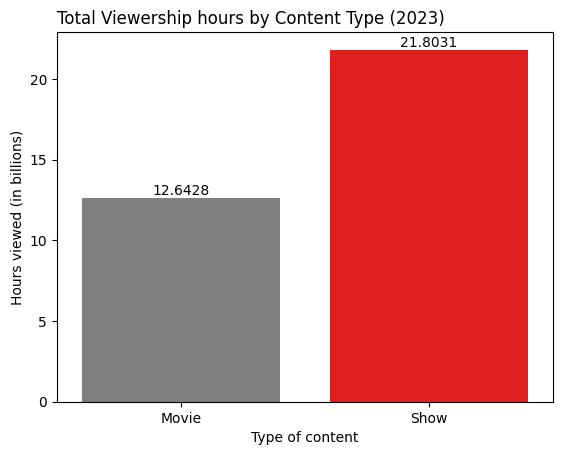

In [22]:
hv_content=df.groupby('Content Type')['Hours Viewed'].sum()
hv_content=billions(hv_content)
hv_content

ax=sns.barplot(x=hv_content.index,
            y=hv_content.values,
            errorbar=None,
            hue=hv_content.index,
            palette=["grey", "red"])
for i in ax.containers:
    ax.bar_label(i)

plt.title("Total Viewership hours by Content Type (2023)", loc='left')
plt.xlabel("Type of content")
plt.ylabel("Hours viewed (in billions)")
plt.show()

Durante 2023, las series acumularon el mayor número de horas vistas y fueron el tipo de contenido con mayor cantidad de estrenos.

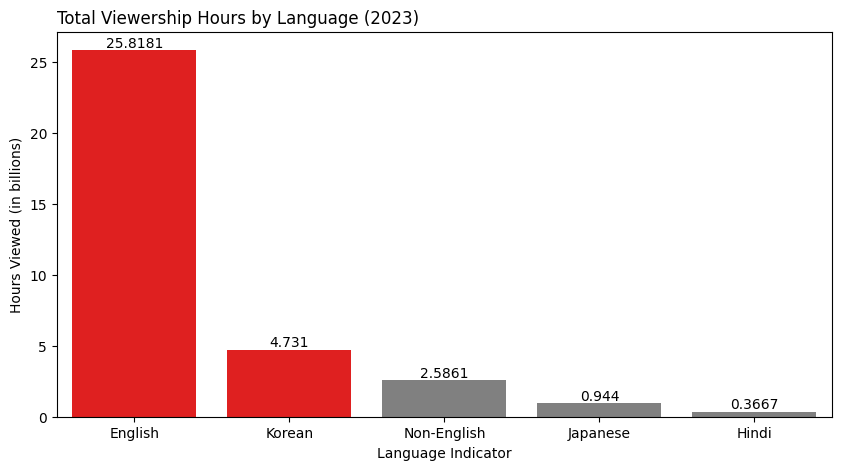

In [37]:
lang_views = df.groupby("Language Indicator")["Hours Viewed"].sum().sort_values(ascending=False)
lang_views=billions(lang_views)

colors=["red", "red", "grey", "grey","grey"]
plt.figure(figsize=(10, 5))
ax=sns.barplot(x=lang_views.index,
            y=lang_views.values,
            hue=lang_views.index,
            errorbar=None,
            palette=colors)
for i in ax.containers:
    ax.bar_label(i)

plt.title("Total Viewership Hours by Language (2023)", loc='left')
plt.ylabel("Hours Viewed (in billions)")
plt.show()

In [24]:
avg_language=df.groupby("Language Indicator").agg({"Hours Viewed":['sum','mean'],
                                                   "Title": 'count'})


#Hours in millions
avg_language["Hours Viewed"]=round(millions(avg_language["Hours Viewed"]),2)
avg_language

Hours Viewed        Title
                            sum   mean count
Language Indicator                          
English                 25818.1  45.37   569
Hindi                     366.7  18.34    20
Japanese                  944.0  21.45    44
Korean                   4731.0  86.02    55
Non-English              2586.1  26.39    98

De igual manera, el contenido en ingles tuvo 569 estrenos y el mayor total de horas vistas, 26 mil millones. En segundo lugar, se encuentra el contenido en coreano, con un total de 55 estrenos y 5 mil millones de horas vistas, lo que podría estar influenciado por la mayor duración promedio de las producciones coreanas.

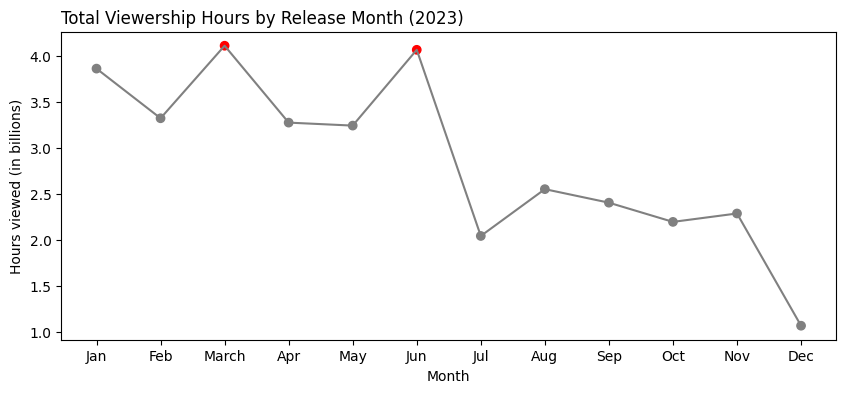

In [25]:
month_views=df.groupby("Release Month")["Hours Viewed"].sum()
month_views=billions(month_views)
month_views.index=["Jan", "Feb", "March", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

colors = ["red" if m in ["March", "Jun"] else "grey" for m in month_views.index]

plt.figure(figsize=(10, 4))
sns.lineplot(x=month_views.index,
             y=month_views.values,
             errorbar=None,
             color="grey")

plt.scatter(x=month_views.index, y=month_views.values, color=colors, marker="o")

plt.title("Total Viewership Hours by Release Month (2023)", loc="left")
plt.xlabel("Month")
plt.ylabel("Hours viewed (in billions)")
plt.show()

Se observó una tendencia decreciente en los niveles de engagement de la audiencia, con picos en marzo y junio, y mínimos en julio y diciembre. Durante este último se tuvo la mayor caída.

Estos cambios podrían deberse a factores como vacaciones y feriados, temporada de estrenos, preferencia por ciertos géneros, y popularidad previa al lanzamiento.

In [26]:
top_5_titles = df.nlargest(5, 'Hours Viewed')[["Title", "Hours Viewed", "Language Indicator", "Content Type"]]
top_5_titles

,Title,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,812100000.0,English,Show
1,Ginny & Georgia: Season 2,665100000.0,English,Show
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie
18214,ONE PIECE: Season 1,541900000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,503000000.0,English,Movie


A pesar de que las series predominan como el tipo de contenido más popular, entre los 5 títulos más vistos 2 son películas.

De igual manera, se observando nuevamente que el contenido en inglés y coreano es el más popular entre la audiencia, lo cual sugiere que puede mantenerse o incrementar el engagement al continuar estrenando contenido en estos idiomas.

In [27]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['Release Season'] = df['Release Month'].apply(get_season)

orden_temp = ['Winter', 'Spring', 'Summer', 'Fall']

df['Release Season'] = pd.Categorical(
    df['Release Season'],
    categories=orden_temp,
    ordered=True
)

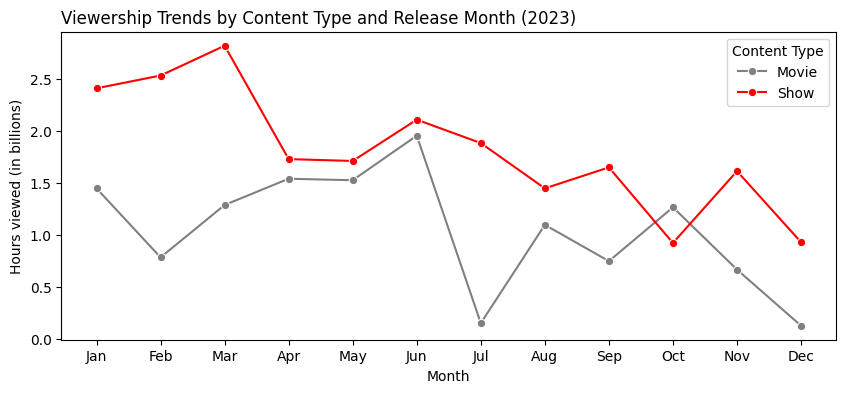

In [28]:
content_month=df.groupby(["Release Month", "Content Type"])["Hours Viewed"].sum().reset_index(level="Content Type")
content_month["Hours Viewed"]=billions(content_month["Hours Viewed"])

plt.figure(figsize=(10, 4))
sns.lineplot(x=content_month.index,
             y=content_month["Hours Viewed"],
             hue="Content Type",
             palette=["grey","red"],
             data=content_month,
             marker="o")

colors = ["red" if m in ["Jun", "Dec", "Oct"] else "grey" for m in content_month.index]

plt.title("Viewership Trends by Content Type and Release Month (2023)", loc="left")
plt.xlabel("Month")
plt.ylabel("Hours viewed (in billions)")
plt.xticks(ticks=range(1,13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

También se analizaron por separado las horas vistas mensualmente por tipo de contenido:

*   **Películas**: Presentan un crecimiento en el total de horas vistas durante el primer trimestre de 2023, y  caídas fuertes en julio y diciembre.
*   **Series**: Mantuvieron niveles de crecimiento y decrecimiento menos profundos, pero también se observa una rápida caída en el último trimestre.

Ambos tipos reflejan un decrecimiento en el engagement hacia finales de año.


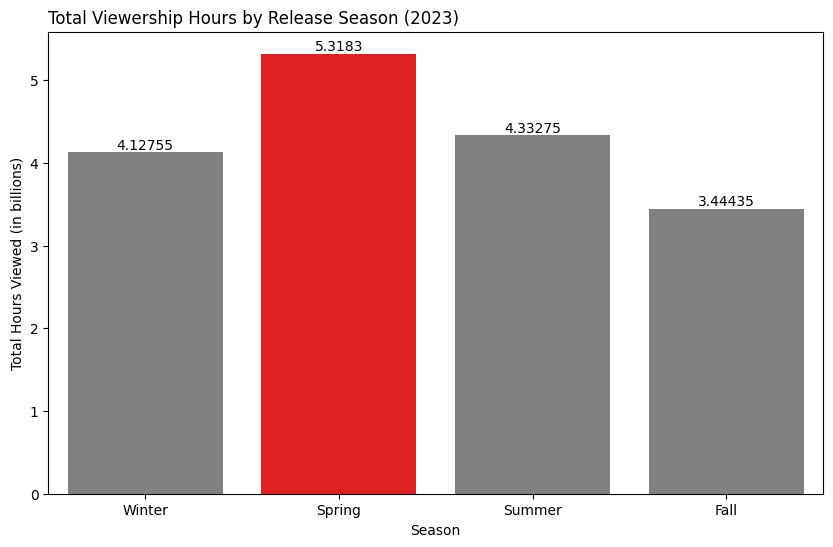

In [38]:
season_views = df.groupby(['Release Season', "Content Type"], observed=False)['Hours Viewed'].sum().reset_index(level="Content Type")
season_views["Hours Viewed"]=billions(season_views["Hours Viewed"])

plt.figure(figsize=(10,6))

ax=sns.barplot(x=season_views.index,
            y=season_views["Hours Viewed"],
            errorbar=None,
            hue=season_views.index,
            palette=["grey", "red", "grey", "grey"])

for i in ax.containers:
    ax.bar_label(i)

plt.title("Total Viewership Hours by Release Season (2023)", loc="left")
plt.xlabel("Season")
plt.ylabel("Total Hours Viewed (in billions)")
plt.show()

In [30]:
top_5_titles = df.nlargest(5, 'Hours Viewed')
top_5_titles

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Release Day,Release Season
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3,Thursday,Spring
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1,Thursday,Winter
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,6,Saturday,Summer
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,8,Thursday,Summer
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,5,Thursday,Spring


En general, el engagement se mantuvo por encima de 3 mil millones de horas vistas por temporada.

Durante la primavera se alcanzó el mayor total de horas vistas, posiblemente impulsada por estrenos como The Night Agent: Season 1, el título con mayor éxito del año.

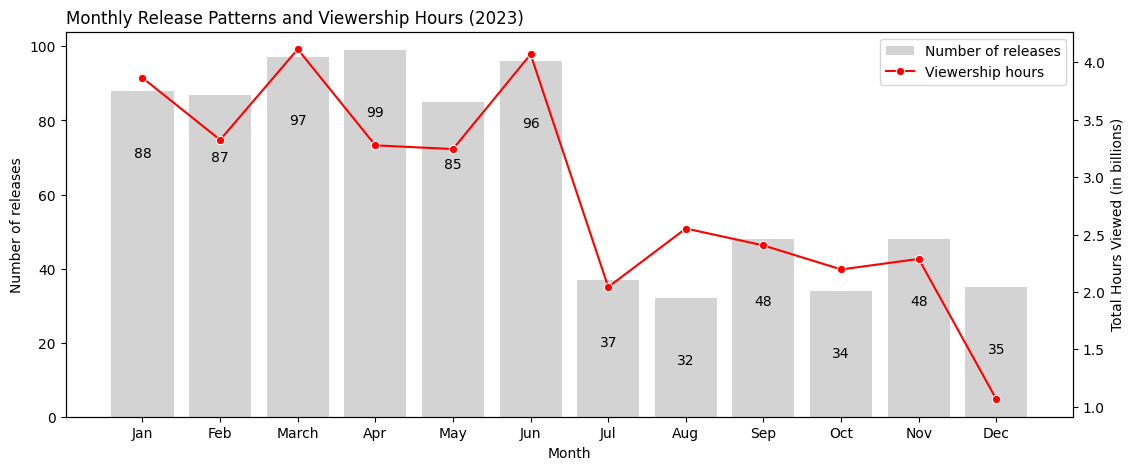

In [31]:
release_month = df['Release Month'].value_counts().sort_index().rename("Number of releases")
release_month.index=["Jan", "Feb", "March", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, ax1 = plt.subplots(figsize=(13, 5))

ax=sns.barplot(x=release_month.index,
    y=release_month.values,
    ax=ax1,
    color="lightgrey",
    label="Number of releases"
)
for i in ax.containers:
    ax.bar_label(i,padding=-50)

ax1.set_ylabel("Number of releases")
ax1.set_xlabel("Month")

ax2 = ax1.twinx()
sns.lineplot(
    x=month_views.index,
    y=month_views.values,
    ax=ax2,
    color="red",
    label="Viewership hours",
    marker="o"
)
ax2.set_ylabel("Total Hours Viewed (in billions)")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

ax1.get_legend().remove()
plt.title("Monthly Release Patterns and Viewership Hours (2023)", loc="left")
plt.show()

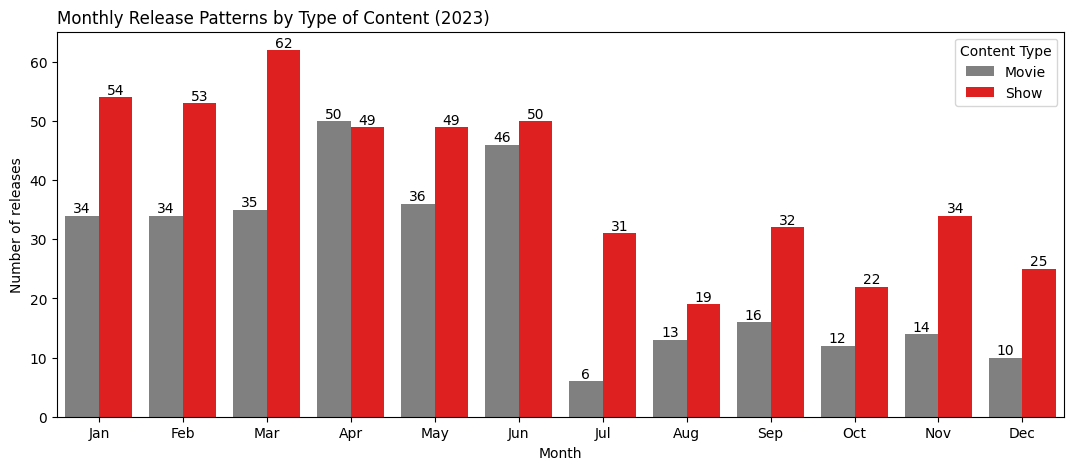

In [32]:
content_release=df.groupby(["Release Month", "Content Type"])["Content Type"].count().rename("Total").reset_index(level="Content Type")

plt.figure(figsize=(13,5))

ax=sns.barplot(data=content_release, x=content_release.index,
    y=content_release["Total"],
    hue=content_release["Content Type"],
    palette=["grey", "red"],
)
for i in ax.containers:
    ax.bar_label(i,)

plt.title("Monthly Release Patterns by Type of Content (2023)", loc="left")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.ylabel("Number of releases")
plt.xlabel("Month")
plt.show()

Durante el primer semestre de 2023, se estrenaron más de 80 títulos por mes. A partir de julio se visualiza un quiebre, solo se lanzaron menos de 50 estrenos mensuales.
Esta caída nos permite observar un cambio drástico en la estrategia de contenido.

Al observar los lanzamientos según tipo de contenido, se obtienen las siguientes observaciones:

*   **Series**: A partir de julio, los estrenos de series disminuyeron drásticamente. Durante el primer semestre se lanzaban más de 45 títulos mensualmente, mientras que en el segundo semestre fueron menos de 35 al mes.
*   **Películas**: A excepción de marzo, el resto del año estuvo dominado por las series. No obstante, se presentó un gran descenso en la cantidad de títulos estrenados en julio, mes en el que solo se lanzaron 6. Después de este mes, el total mensual de estrenos se mantuvo por debajo de 20.


In [33]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

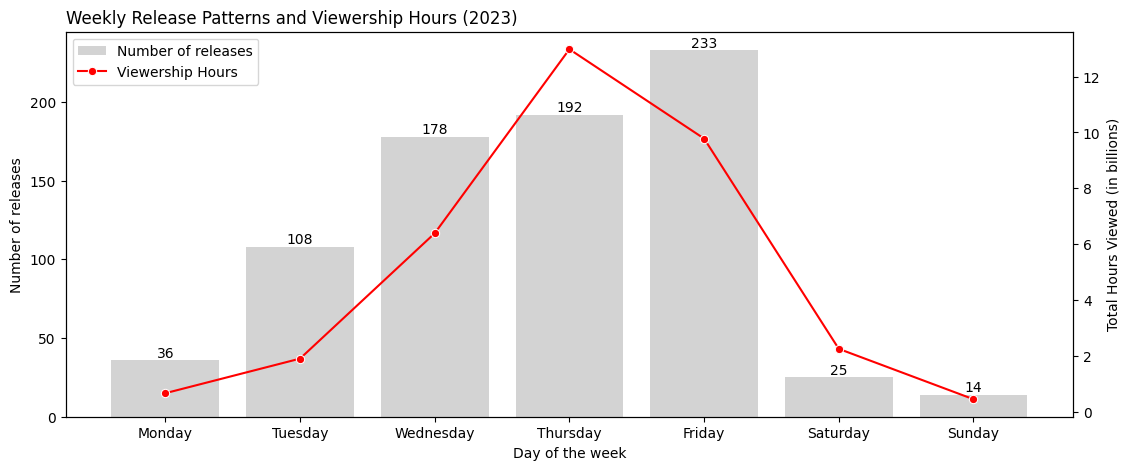

In [34]:
release_day = df['Release Day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
views_day = billions(df.groupby("Release Day")["Hours Viewed"].sum()).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig, ax1 = plt.subplots(figsize=(13, 5))

ax=sns.barplot(
    x=release_day.index,
    y=release_day.values,
    errorbar=None,
    ax=ax1,
    color="lightgrey",
    label="Number of releases"
)
ax1.set_ylabel("Number of releases")
ax1.set_xlabel("Day of the week")
for i in ax.containers:
    ax.bar_label(i)

ax2 = ax1.twinx()
sns.lineplot(
    x=views_day.index,
    y=views_day.values,
    ax=ax2,
    color="red",
    label="Viewership Hours",
    marker="o"
)
ax2.set_ylabel("Total Hours Viewed (in billions)")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax1.get_legend().remove()
plt.title("Weekly Release Patterns and Viewership Hours (2023)", loc="left")
plt.show()

Los estrenos se centran entre miércoles y viernes, los días de mayor interacción de los usuarios con el contenido de la plataforma, especialmente jueves y viernes.

Por otro lado, los fines de semana solo acumularon 39 estrenos en todo el año, reflejando un menor engagement.

In [35]:
important_dates = pd.DataFrame({
    "Holiday Name":["New Year's Day", "Valentine's Day", "Independence Day (US)", "Halloween", "Christmas"],
    "Holiday Day": pd.to_datetime(['2023-01-01', '2023-02-14', '2023-07-04', '2023-10-31', '2023-12-25'])
})

release_holiday = df[df['Release Date'].apply(lambda x: any((x - date).days in range(-3, 4) for date in important_dates["Holiday Day"]))]

def select_holiday(release_date):
    diffs = (important_dates["Holiday Day"] - release_date).abs()
    idx_min = diffs.idxmin()
    return important_dates.loc[idx_min, "Holiday Name"]

release_holiday2=release_holiday.copy()
release_holiday2["Holiday Name"]=release_holiday2["Release Date"].apply(select_holiday)

In [36]:
holidays=release_holiday2.groupby(["Holiday Name", "Content Type"]).agg({'Title': 'count',
                                                       'Hours Viewed': ["sum", "mean"]}).rename(columns={"Hours Viewed":"Hours Viewed (in millions)"})
holidays["Hours Viewed (in millions)"]=round(millions(holidays["Hours Viewed (in millions)"]),2)
holidays.rename(columns={"Title":"Total releases"}, inplace=True)
#holidays.sort_values(by="Hours Viewed (in millions)", ascending=False, inplace=True)
holidays

Total releases Hours Viewed (in millions)  \
                                            count                        sum   
Holiday Name          Content Type                                             
Christmas             Movie                     2                       60.4   
                      Show                      3                       78.4   
Halloween             Movie                     6                      384.1   
                      Show                      9                      422.3   
Independence Day (US) Movie                     1                       12.2   
                      Show                      8                      590.5   
New Year's Day        Movie                     7                      364.8   
                      Show                      2                        6.8   
Valentine's Day       Movie                    14                      177.9   
                      Show                     23                      783.8   

                                           
                                     mean  
Holiday Name          Content Type         
Christmas             Movie         30.20  
                      Show          26.13  
Halloween             Movie         64.02  
                      Show          46.92  
Independence Day (US) Movie         12.20  
                      Show          73.81  
New Year's Day        Movie         52.11  
                      Show           3.40  
Valentine's Day       Movie         12.71  
                      Show          34.08

En relación a los estrenos alrededor de festividades clave en EE.UU.:
-	Alrededor de San Valentín, se realizó la mayor cantidad de estrenos (37), con promedios de 34 millones de horas vistas por serie y 13 millones por película.
-	Año Nuevo y Halloween fueron las festividades con mayor promedio de horas vistas por película.
-	Con respecto a las festividades con mayor horas promedio vistas por serie, destacaron Halloween y el Día de la Independencia.


A partir del análisis realizado, se puede concluir que Netflix alinea sus estrenos con el comportamiento de gran parte de su audiencia.

Las series, especialmente aquellas en inglés y coreano, son el tipo de contenido más producido y, a su vez, el que concentra la mayor cantidad de horas vistas.

Los lanzamientos se concentraron en el primer semestre del año, periodo en el que también se observaron los niveles más elevados de engagement. A partir de julio, la cantidad de estrenos mensuales disminuyó considerablemente, lo cual sugiere un cambio en la estrategia de contenido, priorizando el lanzamiento de series en mayor medida.

También se observa que los días de la semana seleccionados para los estrenos coinciden con aquellos en los que el consumo dentro de la plataforma es más elevado.

Además, Netflix tiende a programar lanzamientos en torno a fechas festivas, tomando en cuenta patrones de consumo tanto a nivel general como según el tipo de contenido.

La diferencia entre la cantidad de estrenos en el primer y segundo semestre del año podría deberse a una estrategia orientada a maximizar un engagement sostenido. Esta consistiría en aprovechar épocas de menor competencia externa para lograr que ciertos títulos se destaquen en mayor medida y mantengan su relevancia por un periodo más extenso.

Se sugiere, a partir de lo analizado, continuar con la producción de contenido en inglés y coreano, especialmente de series, debido al alto nivel de engagement que atrae.

Asimismo, contar con datos más específicos sobre el comportamiento de la audiencia, por ejemplo, sobre las tasas de abandono, las preferencias por género o subgénero, horario en el que la audiencia interactúa con el contenido entre otros detalles, permitiría comprender en mayor profundidad qué factores impulsan el engagement.